In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns

#                                           Simple Linear Regression from Scratch
```js
        Work :
        ------
                We have 1 Input and 1 Output column. After training, the model tries to PREDICT the outcome for new inputs which may or may not be same as the Actual Output, mostly it will be around the actual output.

        Also compare our model built from Scratch with Sklearn Linear Regression model to see if we are correct or not.
```

In [ ]:
class My_LR : # The handwritten calculations are shown in "Simple Linear Regression Calculation" pdf.
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
        self.m = ( np.sum((x_train - x_train.mean()) * (y_train - y_train.mean())) /
                   np.sum(np.power(x_train - x_train.mean(), 2)) )
        
        self.b = y_train.mean() - self.m * x_train.mean()

        print(f"m = {self.m}, b = {self.b}")

    def predict(self, x_test: np.ndarray|int|float):
        return self.m * x_test + self.b
    
def main():
    # df1 = cgpa | package(the total admission amount for each cgpa) |
    df1 = pd.read_csv(r"D:\VS CODE\Data Science\Machine Learning\linear_regression\Dataset\placement.csv")

    #                                       Using our Custom LR Model Object
    print("                     Our Simple LR Model")
    X, Y = df1.iloc[:, 0].values, df1.iloc[:, 1].values # if X is numpy array, then x_train and x_test will be numpy arrays.

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

    lr_obj = My_LR() # created an Empty Linear Regression Model Object.
    lr_obj.fit(x_train, y_train) # trained the model by calculating the correct m and b.

    print(f"For CG {x_test[0]}, the package is {lr_obj.predict(x_test[0])} TK.")

    #                                       Using Sklearn LR Model Object (ML Algo works in 2D Array, not 1D)
    print("\n                     Sklearn LR Model")
    X, Y = df1.iloc[:, :1].values, df1.iloc[:, -1:].values # X.shape = Y.shape = (200, 1).

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

    lr_obj1 = LinearRegression() # created an Empty Linear Regression Model Object.
    lr_obj1.fit(X=x_train, y=y_train) # trained the model by calculating the correct m and b.

    print(f"m = {lr_obj1.coef_[0, 0]}, b = {lr_obj1.intercept_[0]}")
    print(f"For CG {x_test[0][0]}, the package is {lr_obj1.predict(X=np.array(x_test[0], ndmin=2)) [0, 0]} TK.")

if __name__ == '__main__':
    main()

                     Our Simple LR Model
m = 0.557951973425072, b = -0.8961119222429144
For CG 8.58, the package is 3.891116009744203 TK.

                     Sklearn LR Model
m = 0.557951973425072, b = -0.8961119222429144
For CG 8.58, the package is 3.891116009744203 TK.


#                           What Simple Linear Regression Model actually does?

m = 0.557951973425072, b = -0.8961119222429144
For CG 4.79, the PREDICTED package is 1.78 TK and ACTUAL is 1.48


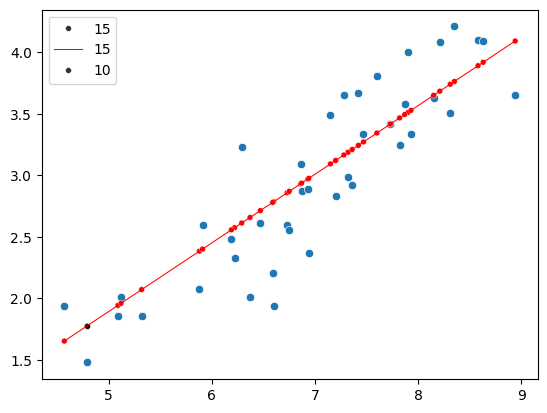

In [ ]:
#                                         Run the above codeblock to run this codeblock.

df1 = pd.read_csv(r"D:\VS CODE\Data Science\Machine Learning\linear_regression\Dataset\placement.csv")
X, Y = df1.iloc[:, 0].values, df1.iloc[:, 1].values # if X is numpy array, then x_train and x_test will be numpy arrays.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

lr_obj = My_LR() # created an Empty Linear Regression Model Object.
lr_obj.fit(x_train, y_train) # trained the model by calculating the correct m and b.

i = 5
sns.scatterplot(x=x_test, y=y_test)

sns.scatterplot(x=x_test, y=lr_obj.predict(x_test), c='red', size=15)
sns.lineplot(x=x_test, y=lr_obj.predict(x_test), c='red', size=15)

sns.scatterplot(x=[x_test[i]], y=[lr_obj.predict(x_test[i])], c='black', size=10)

print(f"For CG {x_test[i]}, the PREDICTED package is {lr_obj.predict(x_test[i]):.2f} TK and ACTUAL is {y_test[i]}")

explanation = """
On the X Axis, for the cgpa values : 
    Blue  Dots are the Actual    Package values on the Y Axis.
    Red   Dots are the Predicted Package values on the Y Axis. (Red line is the REGRESSION LINE model helps to create)

    Black Dot is the PREDICTED Package value for the 5th value which is not the same as the Actual value because Linear
    Regression tries to find the best-fitting straight line (a linear equation i.e. Regression Line) through the data.
    It's not magic — it doesn't guarantee perfect predictions if:
        1) The data isn't perfectly linear (which it almost never is in the real world e.g. the x_test and y_test).
        2) There are other variables affecting the outcome that the model doesn't know about like human decisions, market
           forces, or measurement error.
    
So Simple Linear Regression is all about : Draw that regression line(the Predicted values for input column) in a way with
such m and b, so the Total Error gets minimized.
"""

#                                   Evaluate the Performace of Linear Regression Model

In [11]:
#                                                 1) Train the Model

# df1 = cgpa | package(the total admission amount for each cgpa) |
df1 = pd.read_csv(r"D:\VS CODE\Data Science\Machine Learning\linear_regression\Dataset\placement.csv")
X, Y = df1.iloc[:, :1].values, df1.iloc[:, -1:].values # X.shape = Y.shape = (200, 1).
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

lr_obj1 = LinearRegression() # created an Empty Linear Regression Model Object.
lr_obj1.fit(X=x_train, y=y_train) # trained the model by calculating the correct m and b.

#                                    2) Calculate the Performance Measuring Matrices.

y_predict = lr_obj1.predict(x_test) # returns 2D Numpy Array with the same shape of x_test, (40, 1)

print("mean_absolute_error =", mean_absolute_error(y_true=y_test, y_pred=y_predict)) # returns 'loss'. The less, the good.
print("mean_squared_error =",  mean_squared_error(y_true=y_test, y_pred=y_predict)) # returns 'loss'. The less, the good.
print("Root mean_squared_error =", np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_predict)))

r2_scoree = r2_score(y_true=y_test, y_pred=y_predict)
print("\nR2 Score =", r2_scoree) # 0.78 i.e. the Input column, cgpa, can explain the Variance in Output column by 78%.
# That means 78%, cgpa column can tell us why for that cgpa we've that package. For the rest 22% packages, r2_score can't
# tell us MATHEMATICALLY why for those cgpas, we have the corresponding packages. Those packages are exceptional values.

n = x_test.shape[0] # x_test, y_test, y_predict, they all have same shape. Any one works.
k = 1 # number of input columns.
adjusted_r2_score = 1 - ((1-r2_scoree) * (n-1)/(n-1-k))
print("adjusted_r2_score =", adjusted_r2_score) # always check both r2_score and adjusted_r2_score.

explanation = """
mean_absolute_error (MAE), mean_squared_error (MSE) and Root mean_squared_error (RMSE) returns "MEAN_ERROR" after the
model is trained. Watch [from 1:29:33](https://youtu.be/aEPoLeS6UMM?si=16gM_5Q9aS-L-MFo&t=5373).

mean_absolute_error (MAE) is not used that often since we take ABSOLUTE (mod) here and absolute value is not
differentiable.

mean_squared_error = 0.12. It is less than 0.28 and 0.34 BUT since we squared here, the unit is Output_column's_unit^2.

Root mean_squared_error (RMSE) is used most. The Unit of RMSE is same as Output Column.
"""

mean_absolute_error = 0.2884710931878175
mean_squared_error = 0.12129235313495527
Root mean_squared_error = 0.34827051717731616

R2 Score = 0.780730147510384
adjusted_r2_score = 0.7749598882343415
